<a href="https://colab.research.google.com/github/Scott16198/Scott16198/blob/main/milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Supervised Classification Problem

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Importing Dataset

In [180]:
from google.colab import files
heart = files.upload()


Saving heartmilestone.csv to heartmilestone (1).csv


#Importing All Libraries

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
%matplotlib inline
plt.style.use('seaborn-notebook')
import numpy as np
import warnings
warnings.filterwarnings("ignore")


#Reading the Dataset

In [183]:
#showing the complete dataset
df = pd.read_csv("heartmilestone.csv")
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Showing the first five rows

#Checking the Dataset for missing values 

In [184]:
#looking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No Missing Values

# Looking at Dataset for An Indication of Positive and Negative values for Heart Disease

In [185]:
# looking to see if there are adaquate values for both pos and neg outcomes
print(df['HeartDisease'].value_counts())
print(df['HeartDisease'].value_counts(normalize=True))

1    508
0    410
Name: HeartDisease, dtype: int64
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


504 patients with heart disease

410 without

55% to 45%

#Looking for Duplications in the Dataset

In [118]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


No Duplications Found

#Examining the Datasets Data Types 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


7 numerical and 5 catagorical columns

#Statistical Ananlysis of the Dataset

In [120]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Observations
Resting BP of Zero is a problem

 Cholesterol of Zero is another problem
 
 Old Peak of Negative Values yet another problem



#Univariate Analysis

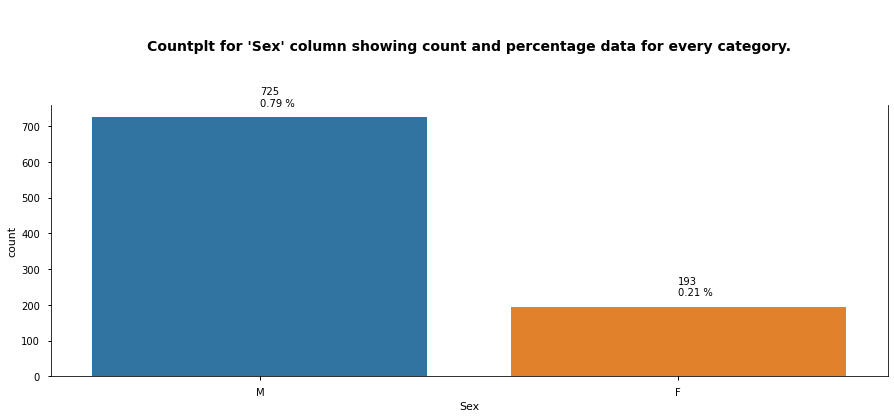

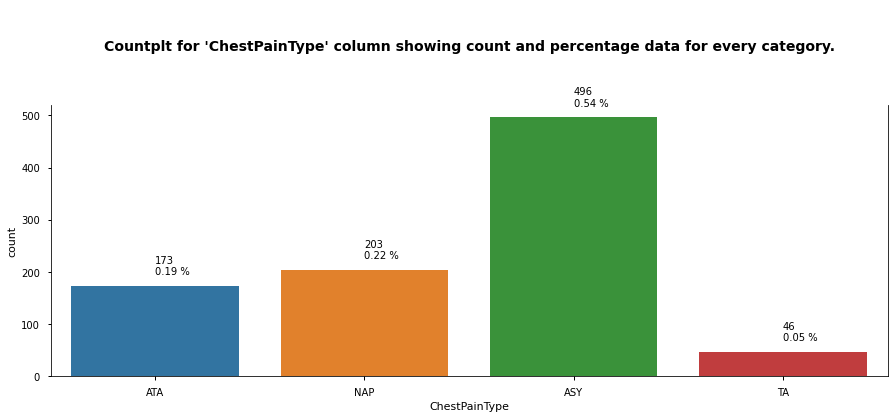

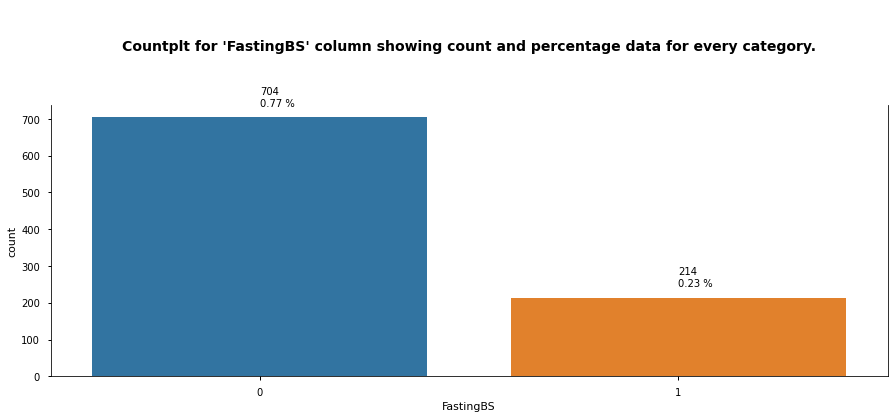

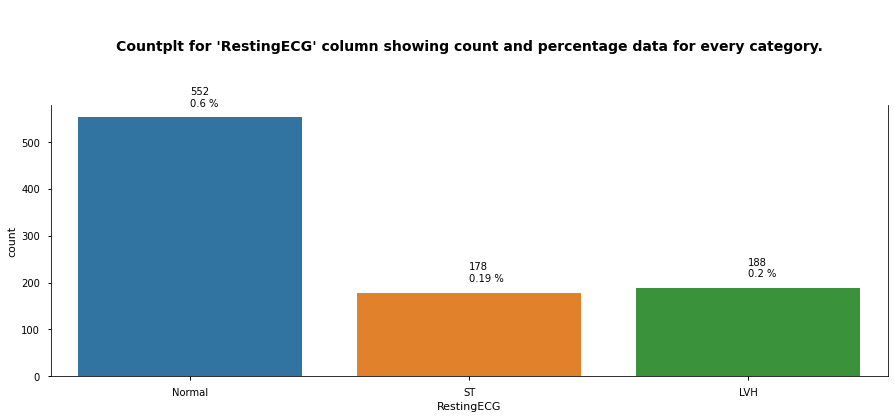

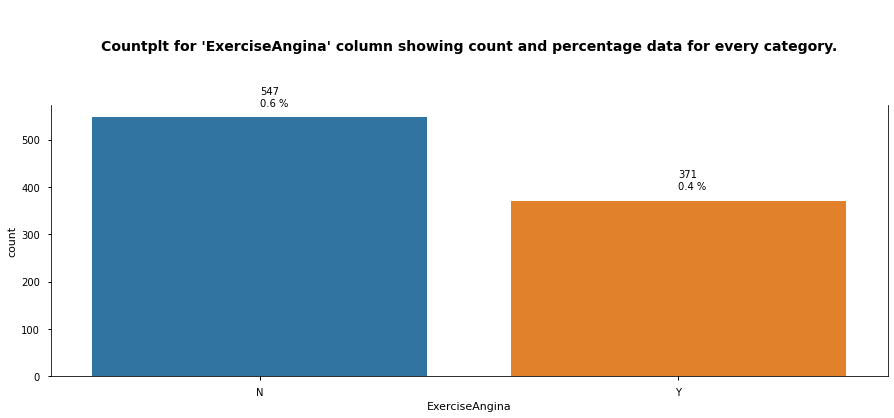

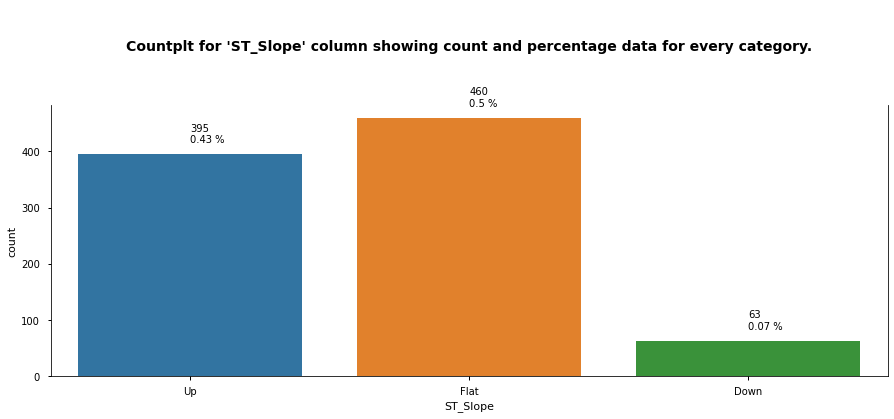

In [186]:
#looking at each attribute individually
for c in df.columns:
    if ((c != 'HeartDisease') and (df[c].dtype == 'object' or df[c].nunique()<=10)):
        plt.figure(figsize=(15,5))
        ax = sns.countplot(df[c])
        ax.set_title(f"\n\nCountplt for '{c}' column showing count and percentage data for every category.\n\n\n", size=14, fontweight='bold')
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')
        ax.spines['top'].set_visible(False)
        plt.show()

# Observations

ST and LVH is 40% of the dataset

Huge Asymptomatic Percentage (54)

80% Men

Flat ST Slope and Up ST Slope is 93%

#Kernal Distribution Estimation Plots

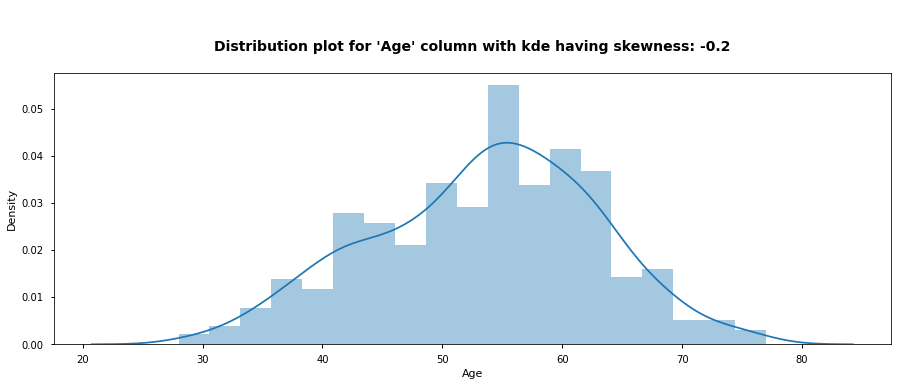

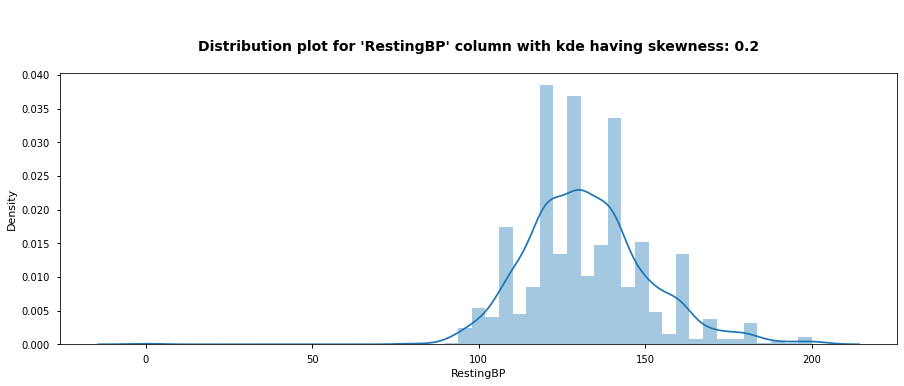

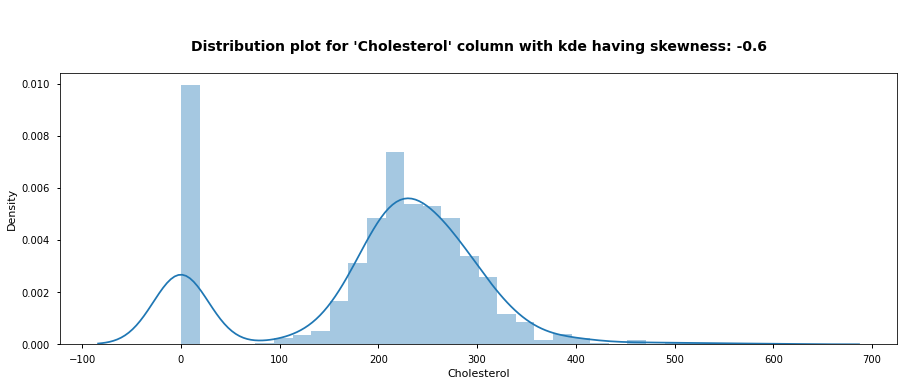

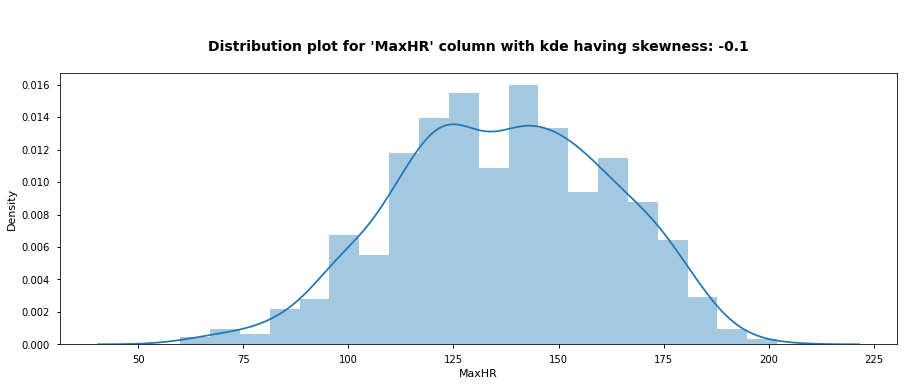

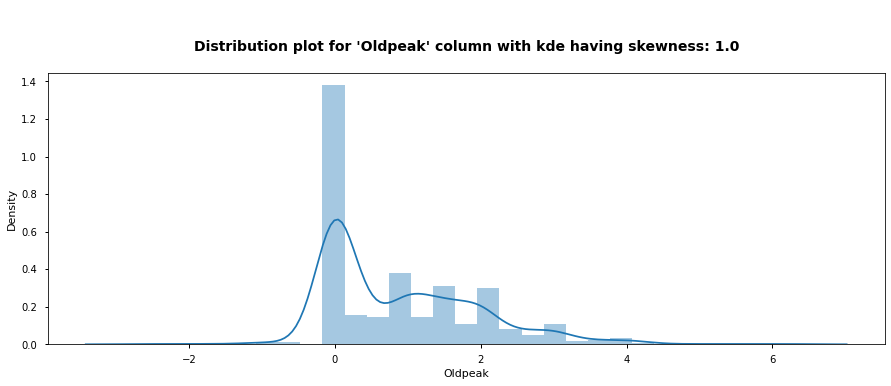

In [187]:
for c in df.columns:
    if (df[c].dtype != 'object' and df[c].nunique()>10):
        plt.figure(figsize=(15,5))
        ax = sns.distplot(df[c])
        ax.set_title(f"\n\nDistribution plot for '{c}' column with kde having skewness: {round(df[c].skew(),1)}\n", size=14, fontweight='bold')
        plt.show()

# Observations

Old Peak Zero and Negative Numbers are a problem

Cholesterol Number of Zero is an Issue

Low resting Heart Rate brings up a Question

# A Closer Look at Those Issues

In [188]:
df[df['RestingBP']<80]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [189]:
print(df[df['Cholesterol']<70]['Cholesterol'].nunique())
print(len(df[df['Cholesterol']<70])/len(df))
df[df['Cholesterol']<70]

1
0.18736383442265794


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [191]:
print(len(df[df['Oldpeak']<0]))
print(len(df[df['Oldpeak']<0])/len(df))
df[df['Oldpeak']<0]


13
0.014161220043572984


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


Old Peak Column has Values below Zero  

Those are eliminated

In [192]:
df = df.drop(df[df['Oldpeak']<0].index)


In [193]:
df[df['RestingBP']<80]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Dropping Resting BP less than 80

In [194]:
df = df.drop(df[df.RestingBP<80].index)

In [195]:
df.shape

(904, 12)

Bivariate Analysis of Columns vs Heart Disease

In [196]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

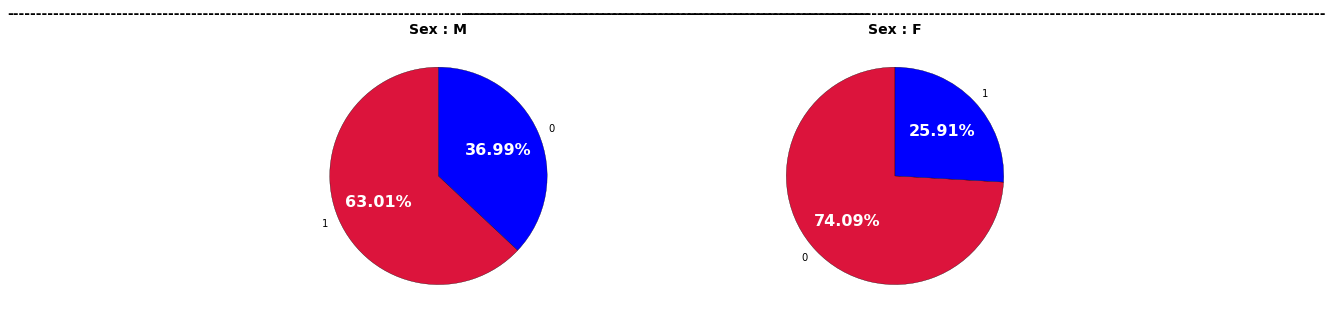

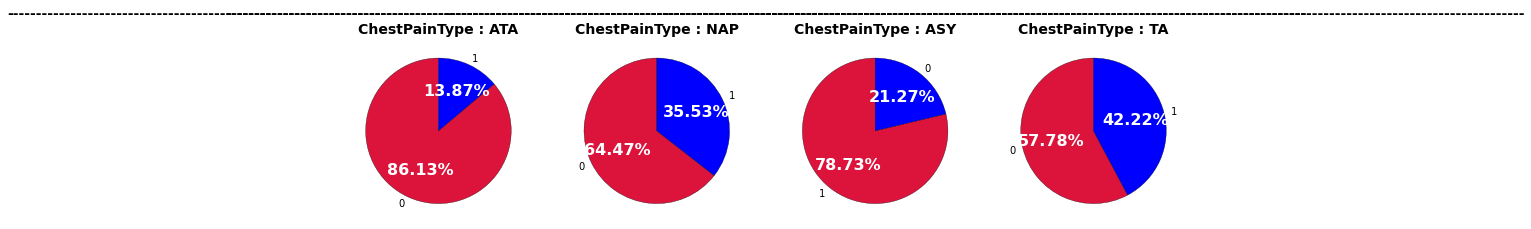

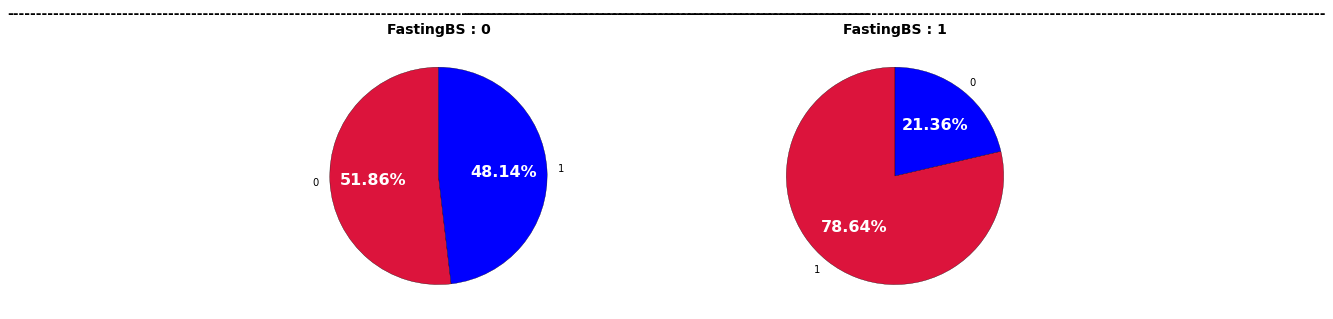

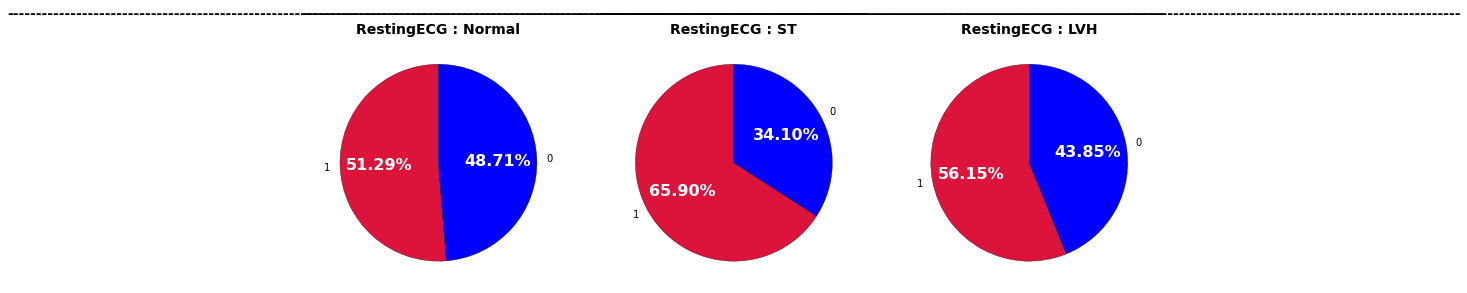

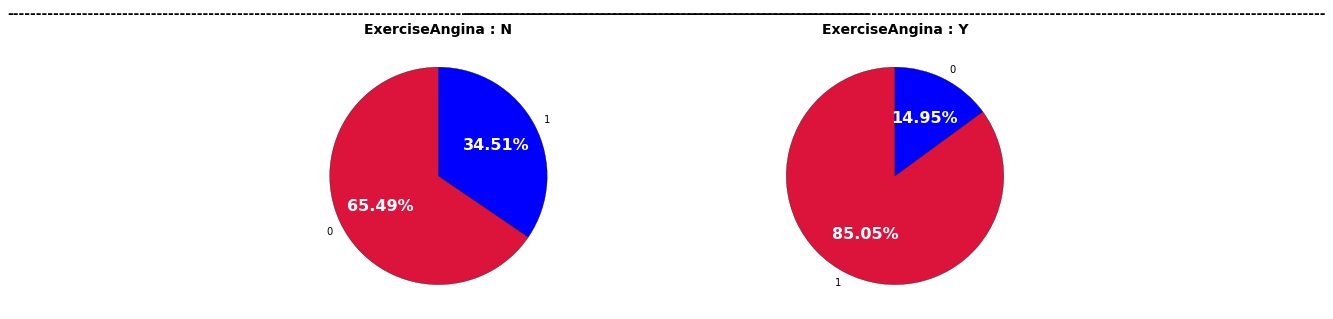

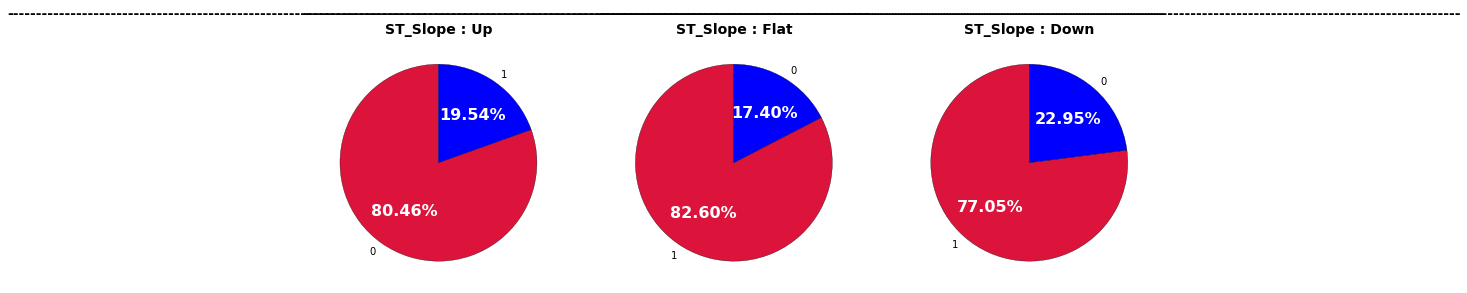

In [197]:
for c in df.columns:
    if (c != 'HeartDisease' and df[c].nunique()<10):
        fig, ax = plt.subplots(ncols=df[c].nunique(), figsize=(15,5))
        p = 0
        for i in df[c].unique():
            ax[p].set_title('-'*150+'\n'+str(c) +' : '+ str(i), size=14, fontweight='heavy')
            patches, texts, pcts = ax[p].pie(df[df[c]==i]['HeartDisease'].value_counts().values,
                  labels=df[df[c]==i]['HeartDisease'].value_counts().index,
                     autopct="%1.2f%%", startangle=90, colors=['crimson', 'blue'],
                     wedgeprops={"edgecolor":"black"})
            plt.setp(pcts, **{'color':'white','weight':'heavy','size':16})
            p += 1 
        fig.show()

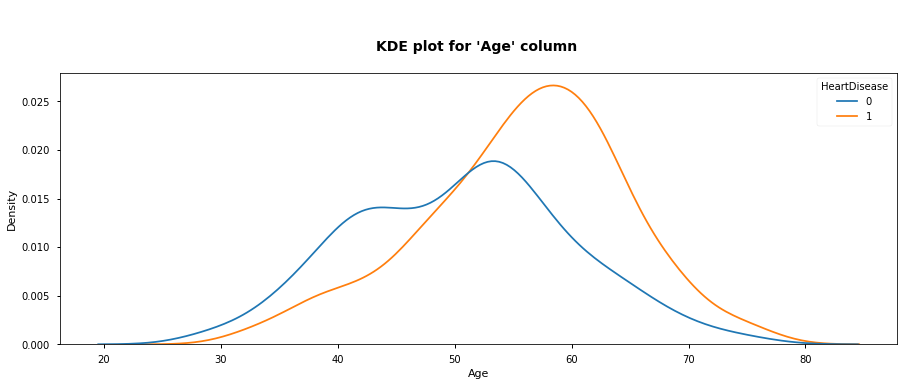

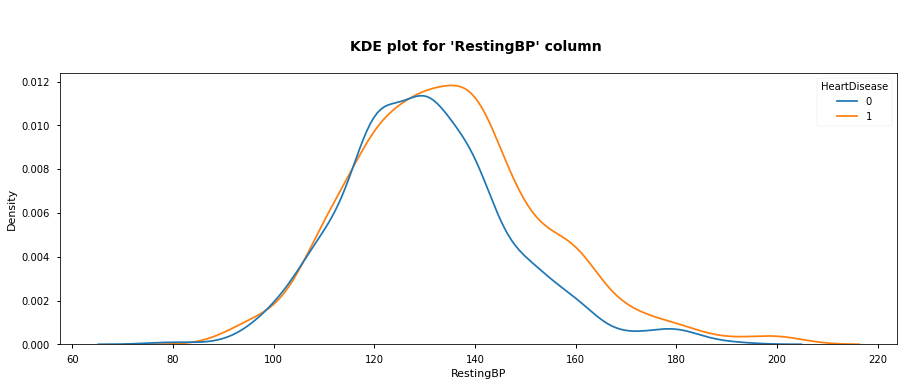

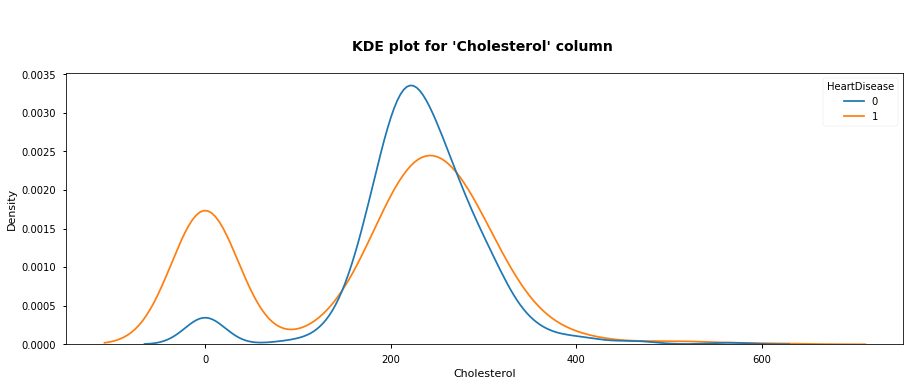

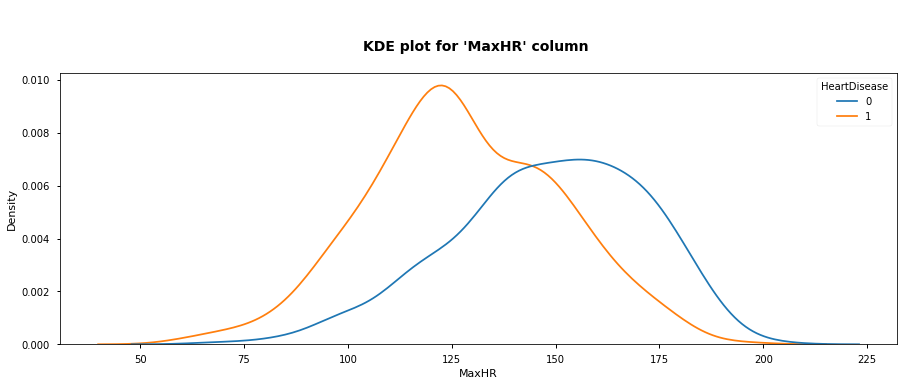

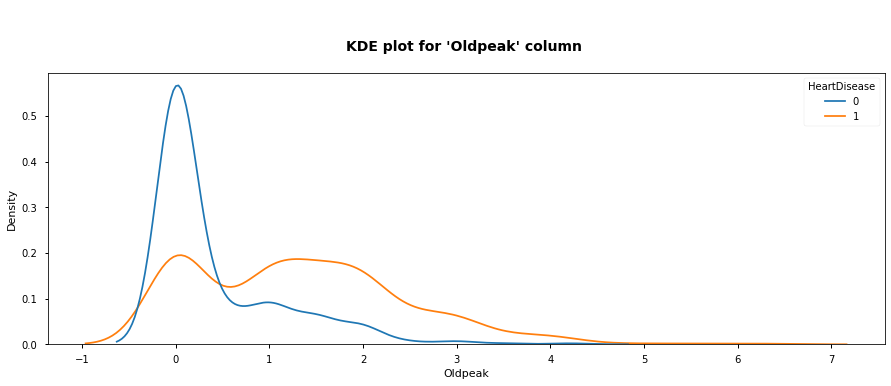

In [198]:
for c in df.columns:
    if (df[c].nunique()>10):
        plt.figure(figsize=(15,5))
        sns.kdeplot(df[c], hue=df['HeartDisease'])
        plt.title(f"\n\nKDE plot for '{c}' column \n", size=14, fontweight='bold')
        plt.show()

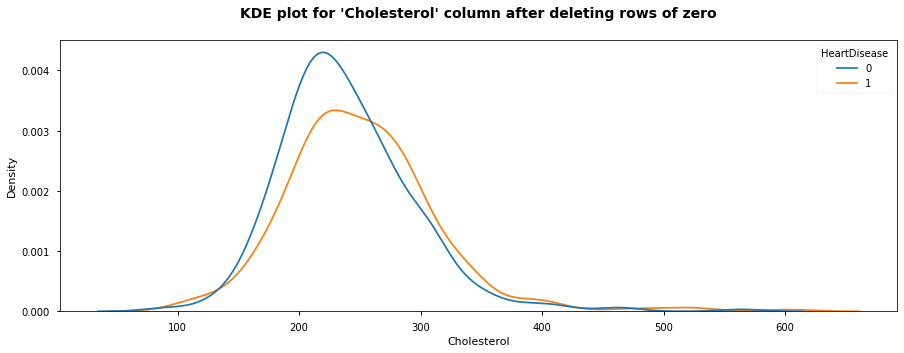

In [199]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['Cholesterol']!=0]['Cholesterol'], hue=df['HeartDisease'])
plt.title(f"KDE plot for 'Cholesterol' column after deleting rows of zero\n", size=14, fontweight='bold')
plt.show()

In [200]:
for c in df.columns:
    if (df[c].dtype == 'object'):
        print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [202]:
df['Sex_num'] = df['Sex'].apply(lambda x:0 if x is 'F' else 1)
df['ExerciseAngina_num'] = df['ExerciseAngina'].apply(lambda x:1 if x=='Y' else 0)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ExerciseAngina_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0


# Using Dummies to change all other categorical attributes to numerical values

In [204]:
for c in df.columns:
    if (df[c].dtype == 'object' and df[c].nunique()>2):
        for i in df[c].unique()[:-1]:
            df[c+'_'+i] = df[c].apply(lambda x : 1 if x is i else 0)
            
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,HeartDisease,Sex_num,ExerciseAngina_num,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,RestingECG_Normal,RestingECG_ST,ST_Slope_Up,ST_Slope_Flat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,1,0,1,0,0,1,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,0,1,0,1,0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,1,0,1,0,0,0,1,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,1,0,1,0,0,1,1,0,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,0,1,0,0,1,0,1,0,1,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,...,0,1,0,0,1,0,1,0,1,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,...,0,0,0,1,0,0,1,0,1,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,...,0,1,0,1,0,0,1,0,1,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,...,1,1,1,0,0,1,1,0,0,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,...,0,0,0,1,0,0,1,0,1,0


#Ading a Column to See if We can improve on the Model Called the Big One

In [205]:
df["the_big_one"] =df['Sex_num']+ df['FastingBS'] +df['ExerciseAngina_num']+ df['ChestPainType_ATA']+df['ChestPainType_NAP']+ df['ChestPainType_ASY']+df['ST_Slope_Flat']
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,Sex_num,ExerciseAngina_num,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,RestingECG_Normal,RestingECG_ST,ST_Slope_Up,ST_Slope_Flat,the_big_one
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,1,0,1,0,0,1,0,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,0,0,0,1,0,1,0,0,1,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,1,0,1,0,0,0,1,1,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,1,0,0,1,1,0,0,1,3
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,1,0,2


Moving The Big One Column into the Middle

In [206]:
col = df.pop("the_big_one")
df.insert(12,col.name,col)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,the_big_one,Sex_num,ExerciseAngina_num,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,RestingECG_Normal,RestingECG_ST,ST_Slope_Up,ST_Slope_Flat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,2,1,0,1,0,0,1,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,2,0,0,0,1,0,1,0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,2,1,0,1,0,0,0,1,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,3,0,1,0,0,1,1,0,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,2,1,0,0,1,0,1,0,1,0


In [207]:
col = []
obj = []
for c in df.columns:
    if (df[c].dtype != 'object'):
        col.append(c)
    else :
        obj.append(c)

print(df.columns)
print(col)
print(obj)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'the_big_one', 'Sex_num', 'ExerciseAngina_num',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY',
       'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Up', 'ST_Slope_Flat'],
      dtype='object')
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'the_big_one', 'Sex_num', 'ExerciseAngina_num', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Up', 'ST_Slope_Flat']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


#Splitting the Data

In [208]:
X_train, X_test, y_train, y_test = train_test_split(df[col].drop('HeartDisease',axis=1),df['HeartDisease'], test_size = 0.25, random_state = 42)

#Training Set Prediction Routine

In [209]:
def model(classifier):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction))) 
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()

#Training Set Confusion Matrix Routine

In [210]:
def model_evaluation(classifier):
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    tn,fp,fn,tp = cm.flatten()
    
    # PRECISION
    print('PRECISION : ','{0:.2%}'.format(tp/(tp + fp)))
    
    # RECALL
    print('RECALL : ','{0:.2%}'.format(tp/(tp + fn)))

In [211]:
def grid_search_cv(classifier,hyperparameters):
    
    GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
    model = GSCV.fit(X_test,y_test)
    print(model)
    print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
    print('BEST PARAMETERS : ',model.best_params_)

#Using Logistic Regression

In [212]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#Area Under the curve

ACCURACY :  83.63%
CROSS VALIDATION SCORE :  87.03%
ROC_AUC SCORE :  83.15%


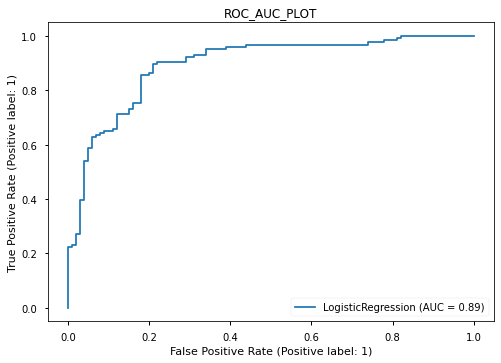

In [213]:
model(classifier_lr)

# Confusion Matrix for Linear Regression

PRECISION :  83.97%
RECALL :  87.30%


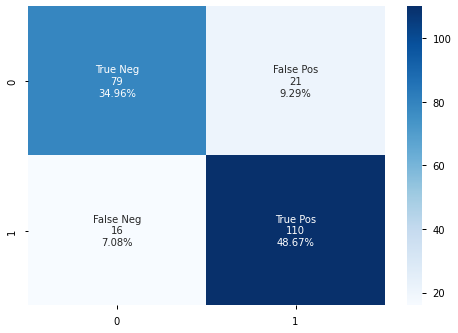

In [214]:
model_evaluation(classifier_lr)

#Decision Tree Entropy

In [215]:
classifier_dte = DecisionTreeClassifier(criterion = 'entropy')

#Area Under The Curve

ACCURACY :  76.55%
CROSS VALIDATION SCORE :  80.25%
ROC_AUC SCORE :  76.60%


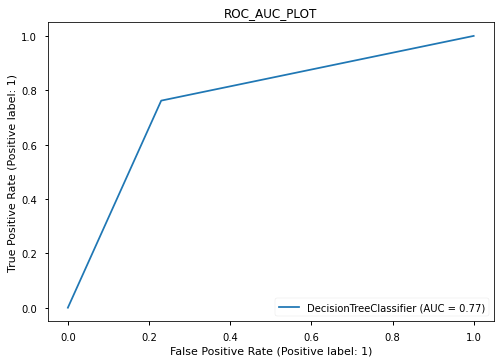

In [160]:
model(classifier_dte)

#Confusion Matrix

PRECISION :  78.69%
RECALL :  76.19%


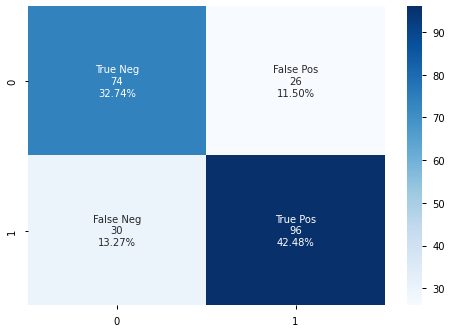

In [217]:
model_evaluation(classifier_dte)

# Decision Tree Gini

ACCURACY :  78.76%
CROSS VALIDATION SCORE :  80.11%
ROC_AUC SCORE :  78.58%


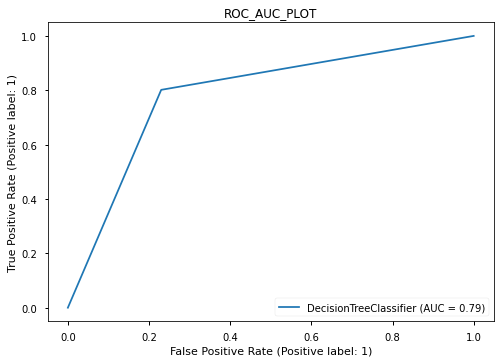

In [218]:
classifier_dtg = DecisionTreeClassifier(criterion = 'gini')
model(classifier_dtg)

# Confusion Matrix Gini

PRECISION :  81.45%
RECALL :  80.16%


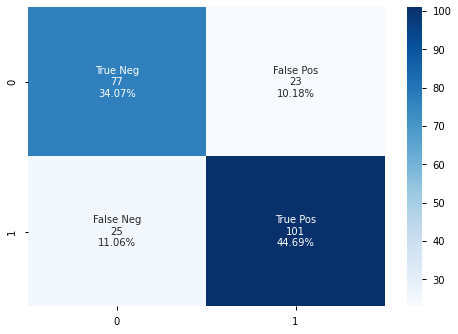

In [219]:
model_evaluation(classifier_dtg)

# Random Forest

In [220]:
classifier_rf = RandomForestClassifier(max_depth = 2,random_state = 0)

#Area Under The Curve RF

ACCURACY :  82.74%
CROSS VALIDATION SCORE :  86.43%
ROC_AUC SCORE :  82.05%


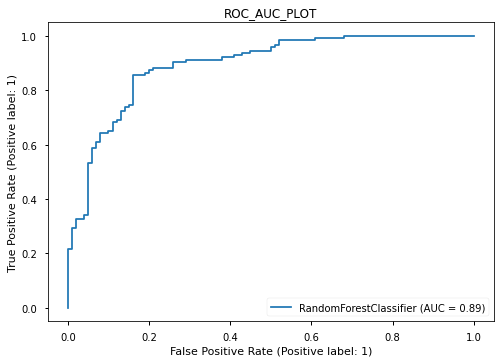

In [221]:
model(classifier_rf)

Confusion Matrix RF

PRECISION :  82.22%
RECALL :  88.10%


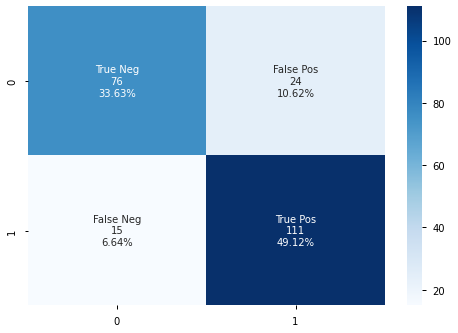

In [222]:
model_evaluation(classifier_rf)

# K Nearest Neighbors

In [223]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 7,p = 1)

In [224]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_search_cv(classifier_knn,hyperparameters)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})
HIGHEST ACCURACY :  78.75%
BEST PARAMETERS :  {'leaf_size': 1, 'n_neighbors': 28, 'p': 1}


# Area Under the curve KNN

ACCURACY :  77.43%
CROSS VALIDATION SCORE :  75.08%
ROC_AUC SCORE :  77.18%


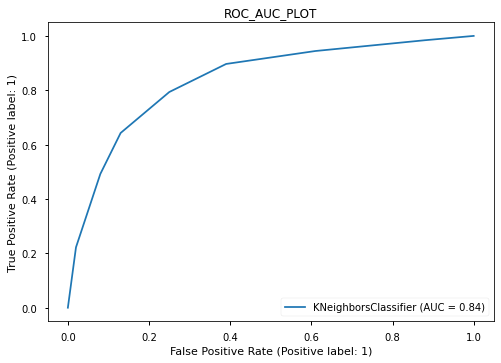

In [225]:
model(classifier_knn)

Confusion Matrix KNN

PRECISION :  80.00%
RECALL :  79.37%


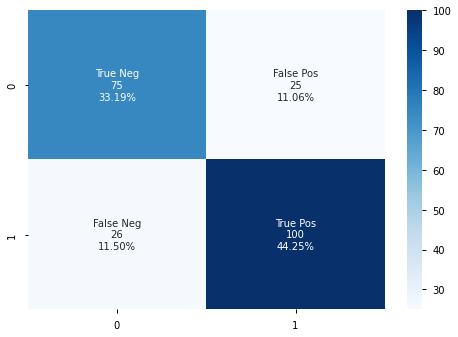

In [226]:
model_evaluation(classifier_knn)

# And the Winner is..........

In [227]:
models = {'MODELS':['LOGISTIC REGRESSION','DECISION TREE CLASSIFIER Entropy',' DECISION TREE CLADDIFIER GINI','RANDOM FOREST CLASSIFIER','K-NEAREST NEIGHBORS'],
         'CROSS VAL ACCURACY (%)':[87.03,80.25,81.44,86.43,75.08]}

In [228]:
cross_val = pd.DataFrame(models)
cross_val.head()

,MODELS,CROSS VAL ACCURACY (%)
0,LOGISTIC REGRESSION,87.03
1,DECISION TREE CLASSIFIER Entropy,80.25
2,DECISION TREE CLADDIFIER GINI,81.44
3,RANDOM FOREST CLASSIFIER,86.43
4,K-NEAREST NEIGHBORS,75.08


# Applying The best training data to the Test Set

In [230]:
def model(classifier):
    
    classifier.fit(X_test,y_test)
    prediction = classifier.predict(X_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction))) 
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,X_test,y_test,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()
X_test
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

# Test set Area Under the Curve

ACCURACY :  84.96%
CROSS VALIDATION SCORE :  81.90%
ROC_AUC SCORE :  84.44%


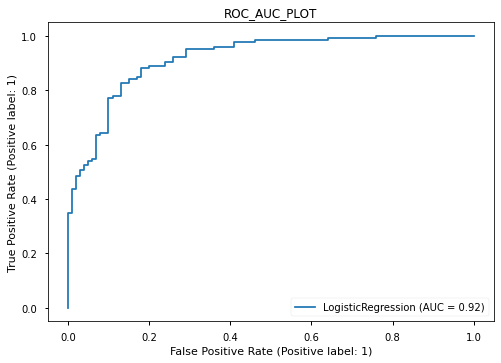

In [231]:
model(classifier_lr)

#Test Confusion matrix

PRECISION :  84.85%
RECALL :  88.89%


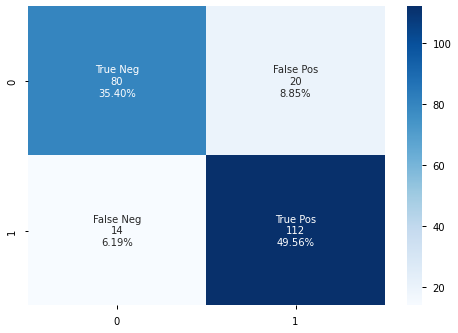

In [232]:
model_evaluation(classifier_lr)

#F1 Score

In [234]:
F1_Score =2*(84.85*88.89)/(84.85+88.89)
print('F1 Score :',(F1_Score))

F1 Score : 86.82302866352019


My Submission 

Using Linear Regression on the Test Data we have a Score of:

Accuracy 84.96%

Cross Validation Score 81.90%

ROC_AUC Score 84.44%

Precision 84.85%

Recall 88.89%

F1 Score of 86.82